## SEGMENTAÇÃO DE CLIENTES BASEADO NO USO DO CARTÃO DE CRÉDITO

O conjunto de dados para este dataset consiste no comportamento de uso do cartão de crédito dos clientes, com cerca de 9000 titulares de cartão de crédito ativos durante os últimos 6 meses com 18 características comportamentais. A segmentação dos clientes pode ser utilizada para definir estratégias de marketing.

**OBJETIVO**     
Identificar o perfil de clientes de cartão de crédito através de comportamentos relacionados as transações bancárias e extrair insights para área de marketing realizar estratégias e campanhas direcionadas para cada perfil de cliente.

**INFO DATASET:**
- CUST_ID: Identificação do titular do cartão de crédito (Categórico)
- BALANCE: Valor do saldo restante em sua conta para fazer compras
- BALANCE_FREQUENCY: Com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = frequentemente atualizado, 0 = não atualizado com frequência)
- PURCHASES: Valor das compras feitas a partir da conta
- ONEOFF_PURCHASES: Maior valor de compra feito de uma só vez
- INSTALLMENTS_PURCHASES: Valor das compras feitas em parcelas
- CASH_ADVANCE: Adiantamento em dinheiro fornecido pelo usuário
- PURCHASES_FREQUENCY: Com que frequência as compras são feitas, pontuação entre 0 e 1 (1 = frequentemente compradas, 0 = não compradas com frequência)
- ONEOFFPURCHASESFREQUENCY: Com que frequência as compras são feitas de uma só vez (1 = frequentemente compradas, 0 = não compradas com frequência)
- PURCHASESINSTALLMENTSFREQUENCY: Com que frequência as compras parceladas são feitas (1 = frequentemente feitas, 0 = não feitas com frequência)
- CASHADVANCEFREQUENCY: Com que frequência o adiantamento em dinheiro é pago
- CASHADVANCETRX: Número de transações feitas com "Adiantamento em Dinheiro"
- PURCHASES_TRX: Número de transações de compra realizadas
- CREDIT_LIMIT: Limite de crédito do cartão para o usuário
- PAYMENTS: Valor do pagamento feito pelo usuário
- MINIMUM_PAYMENTS: Valor mínimo dos pagamentos feitos pelo usuário
- PRCFULLPAYMENT: Percentual do pagamento total pago pelo usuário
- TENURE: Tempo de serviço do cartão de crédito para o usuário

# 1. IMPORTAÇÃO DE BIBLIOTECAS E VISUALIZAÇÃO DO DATASET


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from pyspark.sql import SparkSession
warnings.filterwarnings("ignore")

'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport pandas_profiling\nimport seaborn as sns\nimport warnings\nimport os\nimport yellowbrick\nimport scipy.cluster.hierarchy as shc\nimport matplotlib.patches as patches'

In [0]:

# Iniciar uma sessão Spark
spark = SparkSession.builder.getOrCreate()

# Ler o arquivo CSV no Databricks usando spark.read.csv
df_spark = spark.read.csv("dbfs:/FileStore/shared_uploads/pauloalmeidalog@gmail.com/CC_GENERAL.csv", header=True, inferSchema=True)

# Converter o DataFrame do Spark para um DataFrame do Pandas
dataframe = df_spark.toPandas()

# Mostrar as primeiras linhas do DataFrame
dataframe.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [0]:
dataframe.TENURE.describe()

count    8950.000000
mean       11.517318
std         1.338331
min         6.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: TENURE, dtype: float64

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_profiling
import seaborn as sns
import warnings
import os
#import yellowbrick
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches


# Importar o PySpark e o Pandas
from pyspark.sql import SparkSession
#import pandas as pd

# Iniciar uma sessão Spark
spark = SparkSession.builder.getOrCreate()

# Ler o arquivo CSV no Databricks usando spark.read.csv
df_spark = spark.read.csv("dbfs:/FileStore/shared_uploads/pauloalmeidalog@gmail.com/CC_GENERAL.csv", header=True, inferSchema=True)

# Converter o DataFrame do Spark para um DataFrame do Pandas
dataframe = df_spark.toPandas()

# Mostrar as primeiras linhas do DataFrame
dataframe.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [0]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int32  
 12  PURCHA

In [0]:


dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [0]:
dataframe.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [0]:
# Verificando dados nulos

dataframe.isnull().sum().sort_values(ascending=False).head()


MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [0]:
dataframe.fillna(dataframe.MINIMUM_PAYMENTS.median(), inplace=True)
dataframe.dropna(subset=['CREDIT_LIMIT'], inplace=True)

missing = dataframe.isna().sum()
dataframe.drop(['CUST_ID'], axis=1, inplace=True)

print(missing)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## Tratamento de dados:

- **MINIMUM_PAYMENTS:** Devido à grande discrepância observada entre os valores mínimo e máximo na coluna, optei por utilizar a mediana para imputar os valores ausentes (N.A) nesta coluna. 

A escolha da mediana como método de imputação baseia-se na sua robustez em relação a valores extremos e sua capacidade de fornecer uma estimativa mais representativa da tendência central dos dados quando comparado à média.

- **CUST_ID:** Dropei esta coluna, pois não agrega valor ao modelo.

- **CREDIT_LIMIT:** Dropei a única linha (N.A)


# 2. Análise exploratória de Dados - EDA




## Boxplot

1. **Colunas com Caixas Estreitas e Sem Outliers:**
   - Os dados são menos dispersos e não contêm valores extremos.

2. **Colunas com Caixas Largas e Muitos Outliers:**
   - Os dados têm alta variabilidade e contêm muitos valores extremos, indicando possíveis anomalias ou grande variação nos dados.

3. **Colunas com Distribuição Assimétrica:**
   - Os dados podem ser inclinados para um lado, indicando uma distribuição não normal.

4. **Colunas com Medianas Diferentes:**
   - Pode indicar diferentes níveis centrais para as variáveis em comparação.


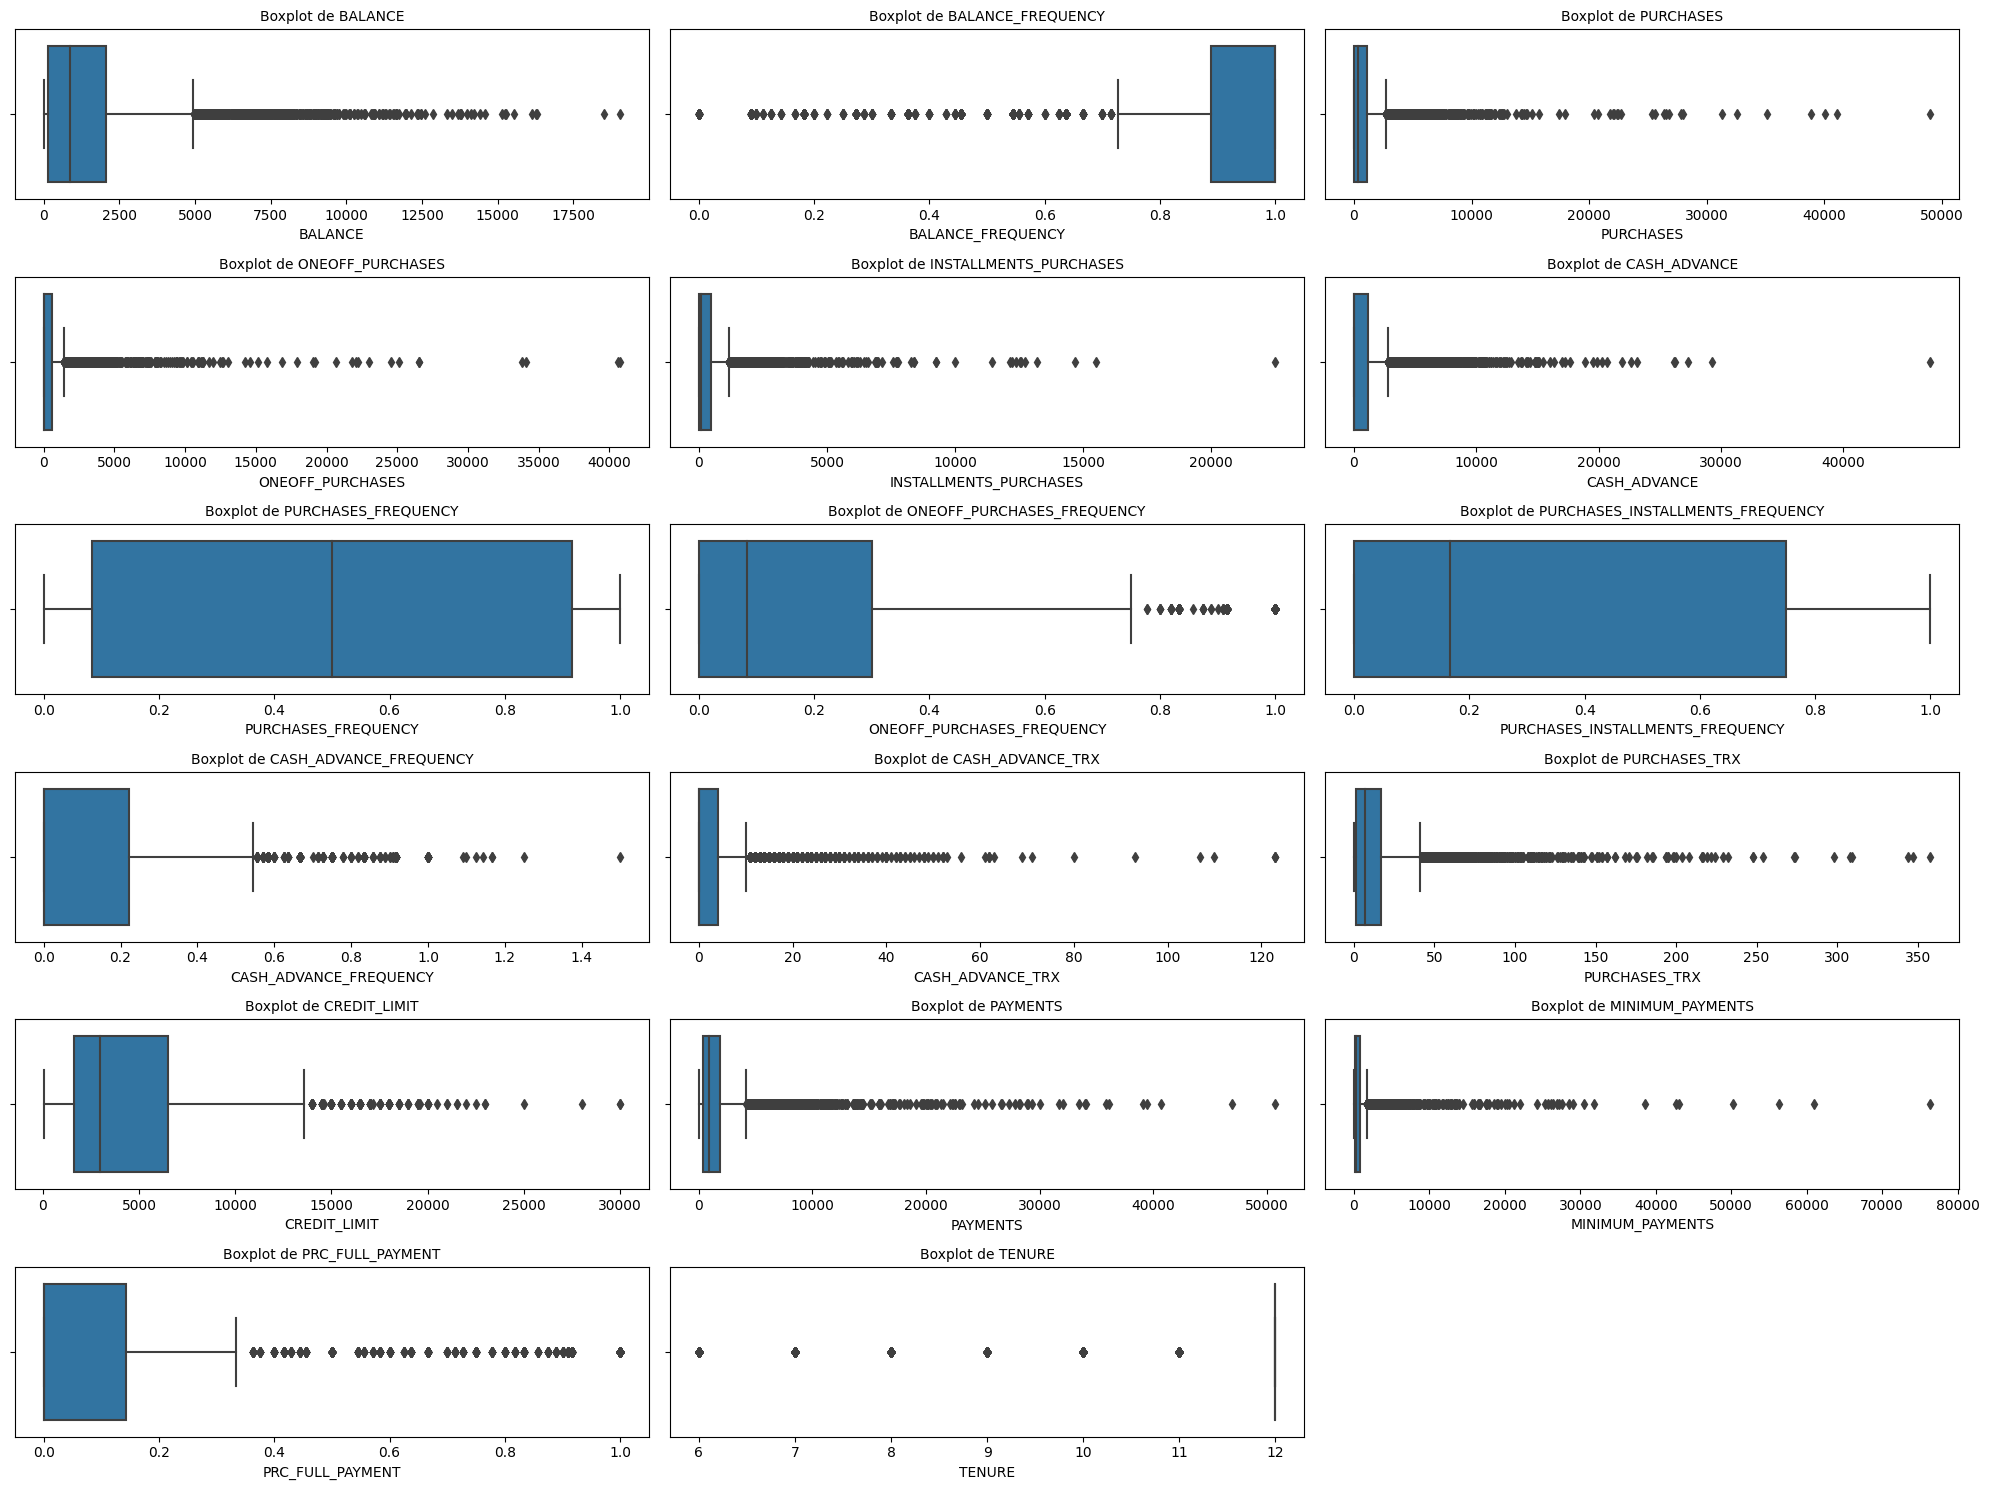

In [0]:
# boxsplot
plt.figure(figsize=(20, 15))  

# Selecionar colunas numéricas
num_cols = dataframe.select_dtypes(include=['number']).columns

# Criar boxplots para cada coluna numérica
for i, column in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)  # Ajustar o layout com mais linhas e colunas
    sns.boxplot(x=dataframe[column])  # Dados no eixo X
    plt.title(f'Boxplot de {column}', fontsize=10)
    plt.xlabel(column)  



plt.tight_layout()
plt.show()



In [0]:
dataframe.MINIMUM_PAYMENTS.describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [0]:

dataframe.CREDIT_LIMIT.describe()

count     8950.000000
mean      4493.982176
std       3638.880937
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

## Análise de Correlação - Heatmap
- Analisando a correlação foi possível identificaralgumas colunas com alto índice, criei um novo Dataframe para analisar-las separadamente com o grafico de dispersão entre as colunas com maior índice





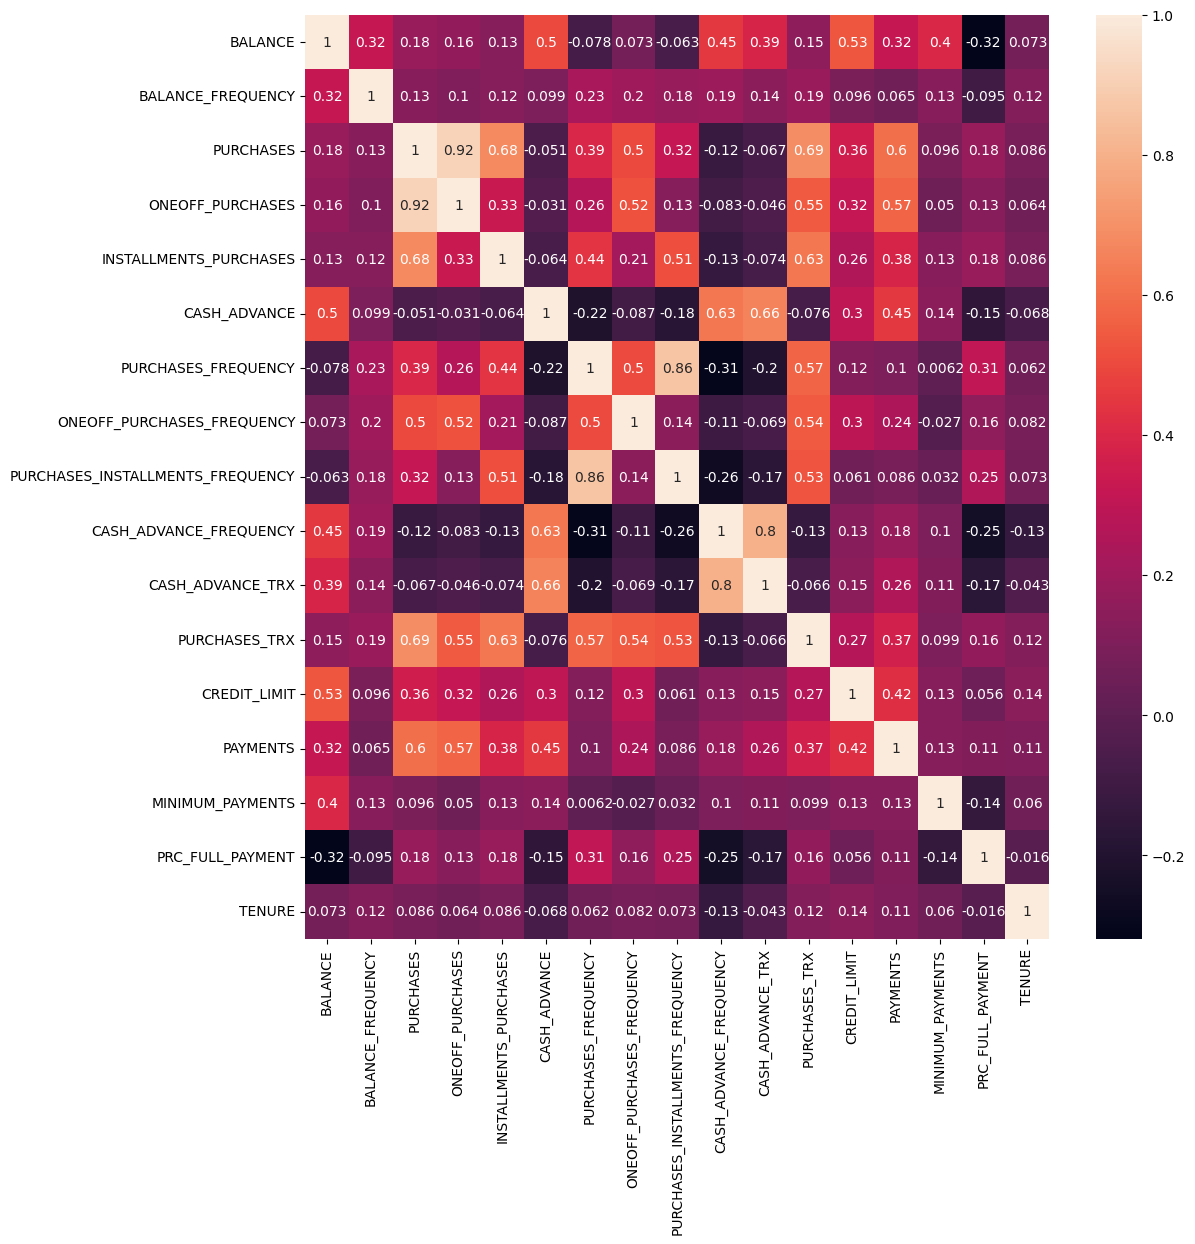

In [0]:

corr_matrix = dataframe.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [0]:
important_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] 

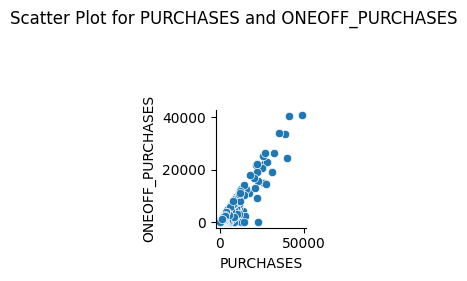

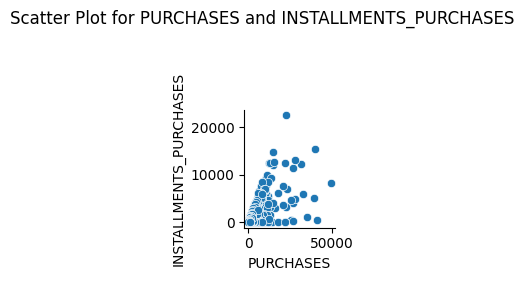

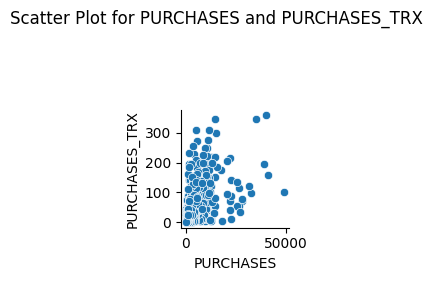

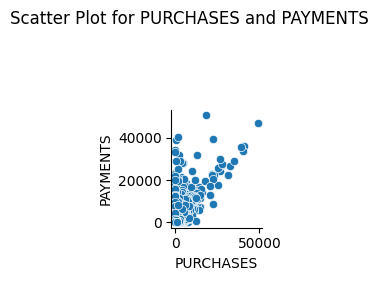

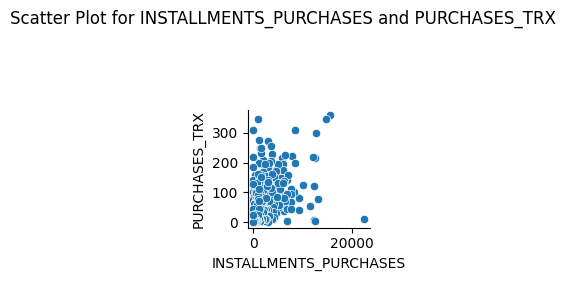

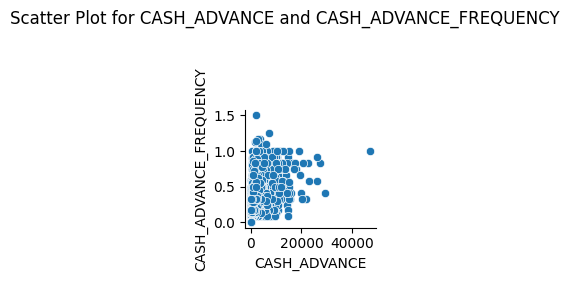

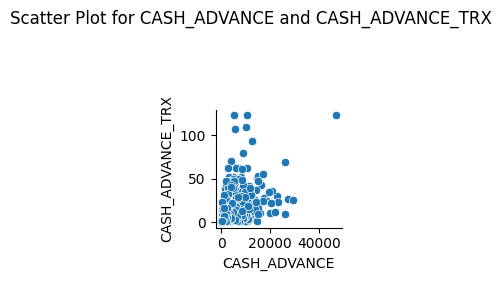

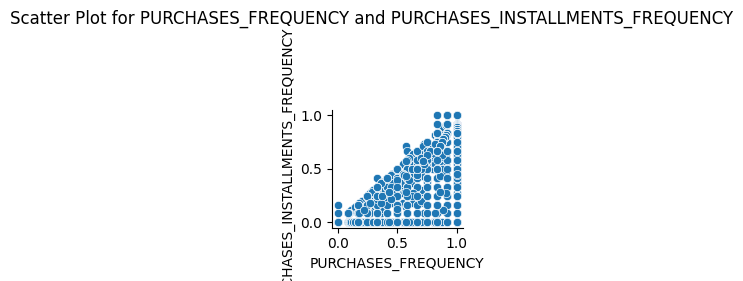

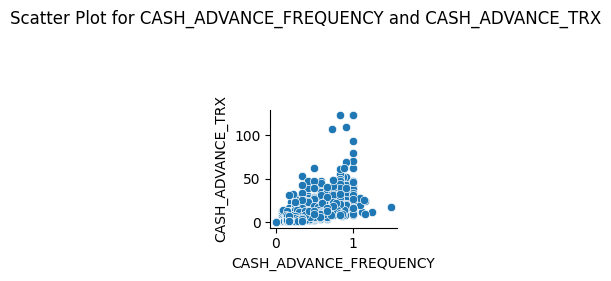

In [0]:
# Encontrar pares de colunas com correlação maior que 0,60 ou menor que -0,6
high_corr_pairs = []  # Inicializa uma lista vazia para armazenar os pares de colunas altamente correlacionadas
checked = set()  # Inicializa um conjunto vazio para armazenar os pares de colunas já verificados

# Percorre cada coluna no DataFrame de correlações
for col1 in corr_matrix.columns:
    # Para cada coluna, percorre novamente todas as colunas para comparar cada par possível
    for col2 in corr_matrix.columns:
        # Verifica se as colunas são diferentes, se a correlação entre elas é maior que 0,6 ou menor que -0,6,
        # e se o par de colunas ainda não foi verificado (para evitar duplicatas)
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.6 and (col2, col1) not in checked:
            # Se todas as condições forem atendidas, adiciona o par de colunas à lista de pares altamente correlacionados
            high_corr_pairs.append((col1, col2))
            # Adiciona o par ao conjunto de pares verificados
            checked.add((col1, col2))

# Gera um gráfico de dispersão para cada par selecionado
for pair in high_corr_pairs:
    # Cria um par de gráficos de dispersão para as colunas do par selecionado
    sns.pairplot(dataframe, height=2, x_vars=pair[0], y_vars=pair[1], kind='scatter')
    # Adiciona um título ao gráfico com o nome das colunas comparadas
    plt.suptitle(f'Scatter Plot for {pair[0]} and {pair[1]}', y=1.35)  # Ajuste a posição do título
    # Ajusta o layout para adicionar mais espaço entre o título e o gráfico
    plt.subplots_adjust(top=0.85)  # Ajuste o valor conforme necessário
    # Exibe o gráfico
    plt.show()


## Correlações Identificadas entre Principais Características



**PURCHASES e ONEOFF_PURCHASES:**

**Insight:** Essas colunas exibem uma correlação significativa, sugerindo uma forte conexão entre compras gerais e compras avulsas. Clientes que se envolvem em compras gerais tendem a fazer transações únicas.

**PURCHASES e INSTALLMENTS_PURCHASES:**

**Insight:** Existe uma correlação notável entre PURCHASES e INSTALLMENTS_PURCHASES, indicando uma ligação coerente entre compras gerais e aquelas feitas em parcelas. Isso sugere que clientes que fazem compras frequentes também aproveitam a opção de dividir seus pagamentos.

**PURCHASES e PURCHASES_TRX:**

**Insight:** A correlação observada entre PURCHASES e PURCHASES_TRX implica uma relação entre o valor total das compras e o número de transações individuais de compra. Essa conexão pode refletir comportamentos de compra variados entre os clientes.

**PURCHASES e PAYMENTS:**

**Insight:** Uma correlação discernível é encontrada entre PURCHASES e PAYMENTS, destacando uma conexão entre a atividade de compra de um cliente e os valores de pagamento subsequentes. Essa correlação indica a dinâmica financeira dos clientes ao gerenciar seus saldos de cartão de crédito.

**INSTALLMENTS_PURCHASES e PURCHASES_TRX:**

**Insight:** Essas colunas exibem uma correlação significativa, sugerindo uma conexão entre compras feitas em parcelas e o número de transações individuais de compra. Clientes que optam por pagamentos parcelados podem se envolver em transações mais frequentes.

**CASH_ADVANCE e CASH_ADVANCE_FREQUENCY:**

**Insight:** Uma correlação notável entre CASH_ADVANCE e CASH_ADVANCE_FREQUENCY indica uma relação entre o montante de adiantamentos em dinheiro e a frequência com que os clientes utilizam essa opção. Essa correlação ilumina os hábitos financeiros dos clientes que buscam liquidez imediata.

**CASH_ADVANCE e CASH_ADVANCE_TRX:**

**Insight:** A correlação observada sugere uma conexão entre o valor total dos adiantamentos em dinheiro e o número de transações envolvendo adiantamentos. Isso pode indicar que os clientes que usam adiantamentos em dinheiro o fazem de forma consistente, com a frequência das transações desempenhando um papel.

**PURCHASES_FREQUENCY e PURCHASES_INSTALLMENTS_FREQUENCY:**

**Insight:** Existe uma correlação significativa entre PURCHASES_FREQUENCY e PURCHASES_INSTALLMENTS_FREQUENCY, indicando uma relação entre a frequência das compras gerais e a frequência das compras feitas em parcelas. Esse insight oferece uma visão sobre as preferências dos clientes em relação ao tempo e à natureza de suas compras.

---

Essas correlações identificadas oferecem insights valiosos sobre a natureza inter-relacionada das principais características do conjunto de dados, fornecendo uma base para entender os comportamentos e padrões financeiros dos clientes.



# 3. Machine learning

## Método do Cotovelo (Elbow Method)

**O Método do Cotovelo é uma técnica para determinar o número ideal de clusters em um conjunto de dados ao utilizar o algoritmo K-Means. Ele ajuda a identificar o ponto em que a adição de mais clusters não resulta em uma melhora significativa na qualidade do agrupamento.**

### Objetivo

- **Determinação do Número de Clusters**: Encontrar o número ótimo de clusters que equilibra a complexidade do modelo e a variabilidade interna dos dados, minimizando a Soma dos Quadrados dos Erros (SSE).

### Como Funciona

- **Execução do K-Means para Diversos Números de Clusters**: O algoritmo K-Means é executado para uma faixa de valores de \( k \), o número de clusters, e a SSE é calculada para cada valor.
- **Plotagem da SSE em Função do Número de Clusters**: Cria-se um gráfico com o número de clusters no eixo x e a SSE no eixo y. O gráfico geralmente mostra uma queda acentuada na SSE seguida de uma estabilização.
- **Identificação do "Cotovelo"**: O ponto no gráfico onde a taxa de redução da SSE começa a diminuir é conhecido como o "cotovelo" e indica o número ideal de clusters.

### Aplicações

- **Seleção de Número de Clusters**: Auxiliar na escolha do número de clusters mais apropriado para análise e segmentação.
- **Qualidade do Agrupamento**: Avaliar a eficácia do clustering, garantindo que mais clusters não resultem em melhorias significativas.



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe339929a80>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

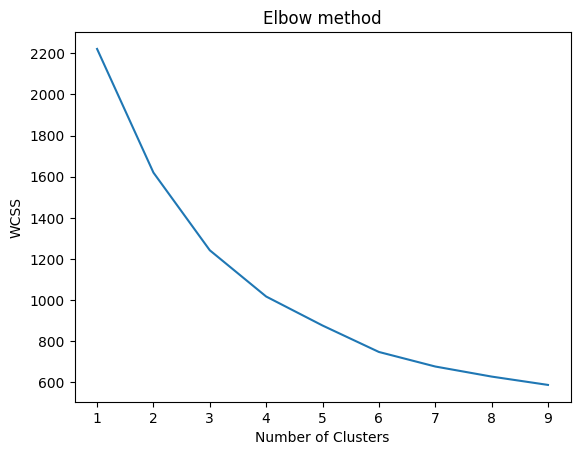

In [0]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(values) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Normalizer

**O Normalizer é uma técnica de pré-processamento de dados utilizada para normalizar amostras de um conjunto de dados, ajustando a escala para que todas as amostras tenham uma norma (ou comprimento) unitária.**

### Objetivo

- **Normalização de Dados**: Ajustar a magnitude dos dados para que cada amostra tenha uma norma igual a 1. Isso é útil para garantir que todos os dados sejam comparáveis em termos de escala.

### Como Funciona

- **Transformação L2**: Normaliza cada amostra dividindo os valores pelos seus normais L2 (raiz quadrada da soma dos quadrados dos valores). O resultado é que cada amostra terá uma norma unitária.

### Aplicações

- **Escalonamento para Algoritmos Sensíveis à Escala**: Preparar dados para algoritmos que são sensíveis à escala, como K-Means e SVM.
- **Comparabilidade de Amostras**: Garantir que todas as amostras tenham a mesma escala, o que pode ser importante para algoritmos que utilizam distâncias ou produtos escalares.




In [0]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)


print(values)

[[3.93529208e-02 7.87219116e-04 9.17897286e-02 ... 1.34230246e-01
  0.00000000e+00 1.15458778e-02]
 [2.93875725e-01 8.34231054e-05 0.00000000e+00 ... 9.84037362e-02
  2.03922922e-05 1.10118488e-03]
 [3.10797802e-01 1.24560826e-04 9.63066935e-02 ... 7.81351110e-02
  0.00000000e+00 1.49472991e-03]
 ...
 [2.27729209e-02 8.11047126e-04 1.40538302e-01 ... 8.02142497e-02
  2.43314235e-04 5.83954164e-03]
 [2.65239400e-02 1.64244246e-03 0.00000000e+00 ... 1.09890537e-01
  4.92732934e-04 1.18255904e-02]
 [1.86405379e-01 3.33425336e-04 5.46775599e-01 ... 4.41566401e-02
  0.00000000e+00 3.00082652e-03]]


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe33ff74f40>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

# Validação do modelo

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe33951d080>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

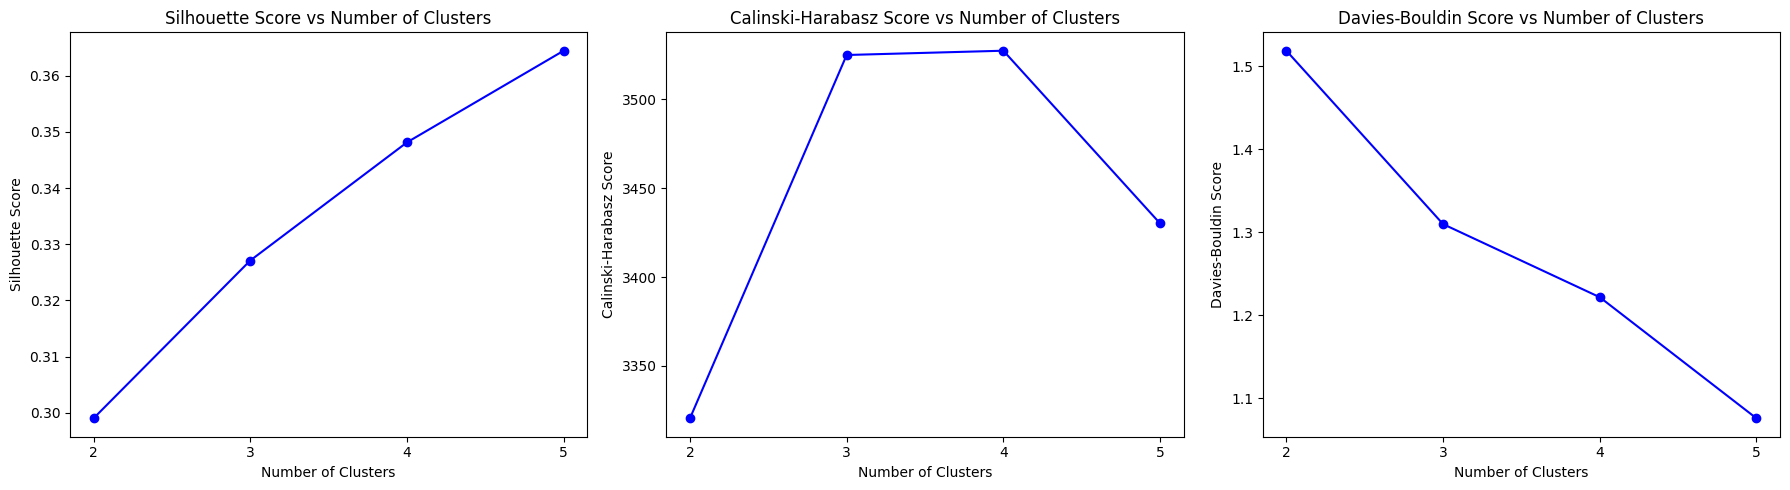

In [0]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_clustering_metrics(values, cluster_range):
    # Listas para armazenar os scores
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []

    # Looping pelos números de clusters
    for n_clusters in cluster_range:
        model = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300).fit(values)
        
        # Calcular e armazenar os scores
        silhouette_scores.append(silhouette_score(values, model.labels_))
        calinski_scores.append(calinski_harabasz_score(values, model.labels_))
        davies_bouldin_scores.append(davies_bouldin_score(values, model.labels_))

    # Criar o dashboard com 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Plot Silhouette Score
    axs[0].plot(cluster_range, silhouette_scores, "bo-")
    axs[0].set_title('Silhouette Score vs Number of Clusters')
    axs[0].set_xlabel('Number of Clusters')
    axs[0].set_ylabel('Silhouette Score')
    axs[0].set_xticks(cluster_range)

    # Plot Calinski-Harabasz Score
    axs[1].plot(cluster_range, calinski_scores, "bo-")
    axs[1].set_title('Calinski-Harabasz Score vs Number of Clusters')
    axs[1].set_xlabel('Number of Clusters')
    axs[1].set_ylabel('Calinski-Harabasz Score')
    axs[1].set_xticks(cluster_range)

    # Plot Davies-Bouldin Score
    axs[2].plot(cluster_range, davies_bouldin_scores, "bo-")
    axs[2].set_title('Davies-Bouldin Score vs Number of Clusters')
    axs[2].set_xlabel('Number of Clusters')
    axs[2].set_ylabel('Davies-Bouldin Score')
    axs[2].set_xticks(cluster_range)

    # Ajustar layout para que os plots não se sobreponham
    plt.tight_layout()
    plt.show()

# Exemplo de uso da função
cluster_range = range(2, 6)
plot_clustering_metrics(values, cluster_range)


## Silhouette Score

**O Silhouette Score é uma métrica utilizada para avaliar a qualidade de uma clusterização, medindo a coesão e separação dos clusters. Ele fornece uma indicação de quão bem cada ponto se encaixa no seu próprio cluster em comparação com outros clusters.**

### Objetivo

- **Avaliação da Qualidade da Clusterização**: Medir o quão bem definidos e separados estão os clusters em um conjunto de dados, ajudando a escolher o número ideal de clusters.

### Como Funciona

- **Cálculo do Silhouette Score para Cada Ponto**: O Silhouette Score para cada ponto é calculado com base na distância média entre o ponto e outros pontos no mesmo cluster (cohesion) e a distância média entre o ponto e pontos no cluster mais próximo (separation). O score varia entre -1 e 1, onde valores próximos a 1 indicam que o ponto está bem posicionado no cluster, valores próximos a 0 indicam que o ponto está na fronteira entre clusters, e valores negativos indicam que o ponto pode ter sido alocado ao cluster errado.

- **Média do Silhouette Score**: O Silhouette Score global para um conjunto de dados é a média dos scores individuais dos pontos. Um Silhouette Score mais alto indica uma melhor separação entre clusters e uma melhor definição dos clusters.

### Aplicações

- **Escolha do Número de Clusters**: Auxilia na seleção do número ideal de clusters ao comparar o Silhouette Score para diferentes números de clusters.
- **Avaliação da Qualidade do Agrupamento**: Fornece uma medida quantitativa da qualidade do agrupamento, ajudando a identificar a configuração de clustering que resulta em clusters mais bem definidos e separados.


## Índice de Calinski-Harabasz (Calinski-Harabasz Index)

**O Índice de Calinski-Harabasz é uma métrica de avaliação de clustering que mede a qualidade dos clusters ao calcular a relação entre a variabilidade dentro dos clusters e a variabilidade entre os clusters.**

### Objetivo

- **Avaliação da Qualidade dos Clusters**: Medir a separação entre os clusters e a coesão dentro dos clusters, ajudando a identificar o número ideal de clusters.

### Como Funciona

- **Cálculo da Variabilidade**: O índice calcula a variabilidade entre os clusters (variância entre clusters) e a variabilidade dentro dos clusters (variância dentro dos clusters). O valor do índice é dado pela razão entre a variância entre clusters e a variância dentro dos clusters.
  
- **Interpretação do Índice**: Um valor mais alto do Índice de Calinski-Harabasz indica que os clusters são mais bem separados e mais coesos. Isso sugere uma melhor qualidade do clustering.

### Aplicações

- **Escolha do Número de Clusters**: Ajuda na seleção do número ideal de clusters comparando o índice para diferentes números de clusters.
- **Avaliação da Qualidade do Agrupamento**: Fornece uma medida da separação e coesão dos clusters, ajudando a determinar a configuração de clustering que resulta em clusters bem definidos.


## Índice Davies-Bouldin (DBI)

**O Índice Davies-Bouldin é uma métrica utilizada para avaliar a qualidade de uma clusterização ao medir a média da relação entre a dispersão dentro dos clusters e a separação entre clusters.**

### Objetivo

- **Avaliação da Qualidade dos Clusters**: Medir a média da relação entre a dispersão dentro dos clusters e a separação entre clusters, ajudando a identificar a qualidade do clustering.

### Como Funciona

- **Cálculo do Índice**: O DBI calcula a relação entre a distância média entre os centros dos clusters e a dispersão média dos pontos dentro dos clusters. Um valor baixo do DBI indica que os clusters são bem separados e coesos, enquanto um valor alto sugere que os clusters estão mal separados e/ou têm alta dispersão.

- **Interpretação do Índice**: Um valor mais baixo do Índice Davies-Bouldin indica uma melhor qualidade do clustering, com clusters mais bem separados e mais coesos.

### Aplicações

- **Escolha do Número de Clusters**: Auxilia na seleção do número ideal de clusters ao comparar o DBI para diferentes números de clusters.
- **Avaliação da Qualidade do Agrupamento**: Fornece uma medida da separação e coesão dos clusters, ajudando a avaliar a configuração de clustering que resulta em clusters mais distintos e bem definidos.

In [0]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

## Validação da estabilidade do Cluster

- **Validação 1:** Aplicação do cluster em um dataset randominco que retornou valores complemente diferentes dos resultados anteriores
- **Validação 2:** Divisão do dataset com numpy para check de estabilidade do cluster: os resultados seguem estáveis seguindo similaridade


In [0]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [0]:

kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe339fd62a0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

In [0]:
s1, dbs1, calinski1 = clustering_algorithm(4, values)
print(s1, dbs1, calinski1)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe33941fe20>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

0.3481201584398509 1.221743763071485 3527.376655544823


In [0]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe33ff74f40>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

0.3644796714542174 1.0754285670513302 3430.1542733684187


In [0]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe33941e8e0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

0.24134699258517747 1.230704664393919 1617.8415653371592


- **Validação 1:** Aplicação do cluster em um dataset randominco que retornou valores complemente diferentes dos resultados anteriores

In [0]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(4, random_data)

print(s, dbs, calinski)
print(s2, dbs2, calinski2)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe339929a80>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

0.04050818607090074 3.8806605390797255 337.70860388948665
0.3644796714542174 1.0754285670513302 3430.1542733684187



- **Validação 2:** Divisão do dataset com numpy para check de estabilidade do cluster: os resultados seguem estáveis seguindo similaridade

In [0]:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe33953b560>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

0.36869319576556703 1.059396866948564 1203.9950442107481
0.35377819723249976 1.1400277086954853 1194.2106708991453
0.36691398491405586 1.0990057242821496 1167.4051888887539


In [0]:
centroids

array([[7.58348024e-02, 2.29914710e-04, 1.23319433e-01, 5.00239349e-02,
        7.33943316e-02, 2.48650572e-02, 1.70905857e-04, 3.42020455e-05,
        1.38258139e-04, 8.27730761e-06, 1.30754902e-04, 2.85789366e-03,
        9.41607417e-01, 1.53757315e-01, 5.72603479e-02, 7.41745116e-05,
        3.53549424e-03],
       [2.98319188e-01, 2.25834787e-04, 4.32741467e-02, 2.38593731e-02,
        1.94207849e-02, 4.88894763e-01, 4.58153772e-05, 1.60103985e-05,
        3.06552418e-05, 7.71783713e-05, 1.79934461e-03, 8.39659018e-04,
        6.14358501e-01, 3.68061729e-01, 1.16377044e-01, 1.52964524e-05,
        2.89067083e-03],
       [1.56241014e-01, 2.41473375e-04, 4.16818582e-01, 2.40766419e-01,
        1.76209938e-01, 3.45660035e-02, 1.97361958e-04, 8.48361406e-05,
        1.45490119e-04, 1.11556006e-05, 2.14092604e-04, 5.91403532e-03,
        5.81211245e-01, 4.40869804e-01, 9.97310819e-02, 7.04188354e-05,
        3.09078897e-03],
       [5.29100882e-01, 2.87659223e-04, 8.53505017e-02, 4.238

# 4.CONCLUSÃO
 **Foi decidido utilizar o modelo com 4 clusters, devido ao resultado das métricas de validação**

## Visualização do cluster

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe33953b4c0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

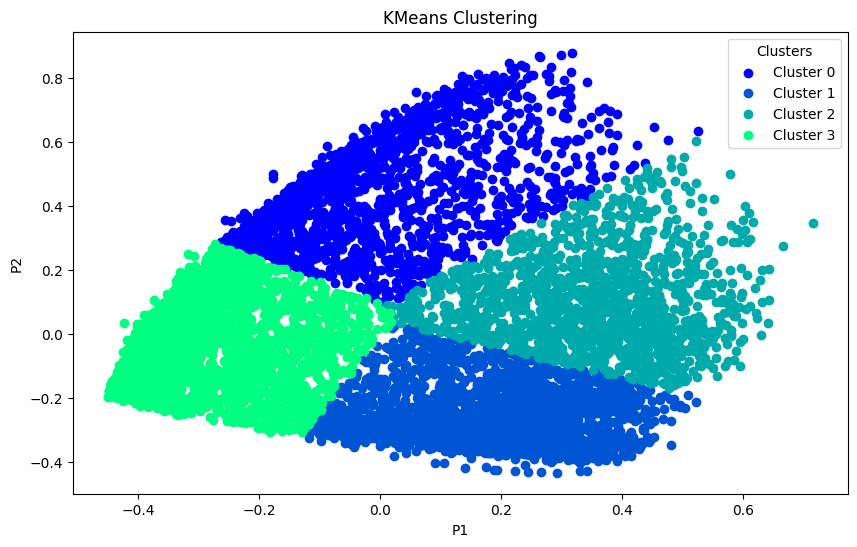

In [0]:


# Número de clusters desejados
n_clusters = 4

# Criação do modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_principal)

# Previsão dos clusters
labels = kmeans.predict(X_principal)

# Criação de um mapa de cores para os clusters
colors = plt.cm.winter(np.linspace(0, 1, n_clusters))

# Visualizando a clusterização com um gráfico de dispersão
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(X_principal.loc[labels == i, 'P1'], 
                X_principal.loc[labels == i, 'P2'], 
                color=colors[i], 
                label=f'Cluster {i}')

plt.title('KMeans Clustering')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend(title='Clusters')  # Adiciona uma legenda com o título 'Clusters'
plt.show()


## Interpretando o perfil de clientes de acordo com Clusters


**Analisando as principais features agrupadas por Cluster, foi possível identificar as seguintes caracteristicas:**
- **CLUSTER 0:** Clientes que menos gastam. Clientes com o maior limite. Bons pagadores. Maior número de clientes.
- **CLUSTER 1:** Maior número de saques. Menor quantidade de compras. Limite de Crédito alto. Nem sempre pagam. 
- **CLUSTER 2:** Maior valor em compras. Menor quantidade de clientes. Melhores pagadores.

- **CLUSTER 3:** Clientes que mais gastam. Piores pagadores. Boa quantidade de clientes.


In [0]:

dataframe["CLUSTER"] = labels
description = dataframe.groupby("CLUSTER")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
CLUSTER,,,,,,
0,931.982343,3123.303125,191.355541,4000.014166,3409.277141,1501
1,2964.634468,267.670529,1830.861592,4514.104373,1010.449226,2571
2,2086.557698,810.110392,2208.563377,3321.480565,3330.219609,1507
3,544.831368,706.493023,129.997516,5222.748637,824.030429,3371


In [0]:


dataframe.groupby("CLUSTER")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
CLUSTER,,,,,,,,
0,1501.0,0.310071,0.374326,0.0,0.0,0.1,0.636364,1.0
1,2571.0,0.004062,0.031100,0.0,0.0,0.0,0.000000,0.6
2,1507.0,0.066639,0.140057,0.0,0.0,0.0,0.083333,1.0
3,3371.0,0.237158,0.342039,0.0,0.0,0.0,0.416667,1.0


In [0]:
dataframe.groupby("CLUSTER")["CREDIT_LIMIT"].describe()

,count,mean,std,min,25%,50%,75%,max
CLUSTER,,,,,,,,
0,1501.0,4000.014166,3653.786408,150.0,1500.0,2725.0,5500.0,30000.0
1,2571.0,4514.104373,3546.627845,200.0,1800.0,3000.0,6500.0,22000.0
2,1507.0,3321.480565,3147.672518,50.0,1200.0,2000.0,4000.0,20000.0
3,3371.0,5222.748637,3734.314990,300.0,2500.0,4000.0,7000.0,30000.0


In [0]:
dataframe.groupby("CLUSTER")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
CLUSTER,,,,,,,,
0,1501.0,931.982343,1401.538026,0.000000,157.763858,427.186194,1050.527038,13479.28821
1,2571.0,2964.634468,2459.681303,1.691842,1204.938931,2113.287399,4146.564134,18495.55855
2,1507.0,2086.557698,2142.732799,0.000000,873.836715,1310.839573,2507.245921,19043.13856
3,3371.0,544.831368,1063.024853,0.000000,25.365879,93.672733,516.127115,11278.95243


In [0]:
dataframe.groupby("CLUSTER")["PURCHASES"].describe()

df1 = dataframe.groupby("CLUSTER")["PURCHASES"].sum()
df1_percentage = df1 / df1.sum()

df1 = df1.to_frame()  # Converte a Série para um DataFrame
df1["%"] = df1_percentage.round(1)*100

df1["PURCHASES"] = df1["PURCHASES"].apply(lambda x: f'{x:,.2f}'.replace(',', '.'))


df1

,PURCHASES,%
CLUSTER,,
0,4.688.077.99,50.0
1,688.180.93,10.0
2,1.220.836.36,10.0
3,2.381.587.98,30.0


## Análise de correlação por Cluster

In [0]:



def plot_correlations_by_cluster(data):
    """
    Plota gráficos de dispersão para pares de colunas com correlação significativa, 
    usando a coluna 'CLUSTER' do DataFrame para classificação nos gráficos.

    :param data: DataFrame contendo os dados com a coluna 'CLUSTER'.
    """
    # Verifica se a coluna 'CLUSTER' está no DataFrame
    if 'CLUSTER' not in data.columns:
        raise ValueError("A coluna 'CLUSTER' não foi encontrada no DataFrame.")

    # Calcula a matriz de correlação
    corr_matrix = data.corr()

    # Encontrar pares de colunas com correlação maior que 0,60 ou menor que -0,6
    high_corr_pairs = []
    checked = set()

    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.6 and (col2, col1) not in checked:
                high_corr_pairs.append((col1, col2))
                checked.add((col1, col2))
    
    # Gera um gráfico de dispersão para cada par selecionado
    for pair in high_corr_pairs:
        plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
        sns.scatterplot(data=data, x=pair[0], y=pair[1], hue='CLUSTER', palette='viridis')
        #plt.title(f'Scatter Plot for {pair[0]} and {pair[1]}')
        plt.suptitle(f'Scatter Plot for {pair[0]} and {pair[1]}', y=1.05)  # Ajuste a posição do título
        plt.subplots_adjust(top=0.9)  # Ajuste o valor conforme necessário
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])
        plt.legend(title='CLUSTER')  # Adiciona uma legenda com o título 'CLUSTER'
        plt.show()

# Exemplo de uso:
# plot_correlations_by_cluster(data=dataframe)


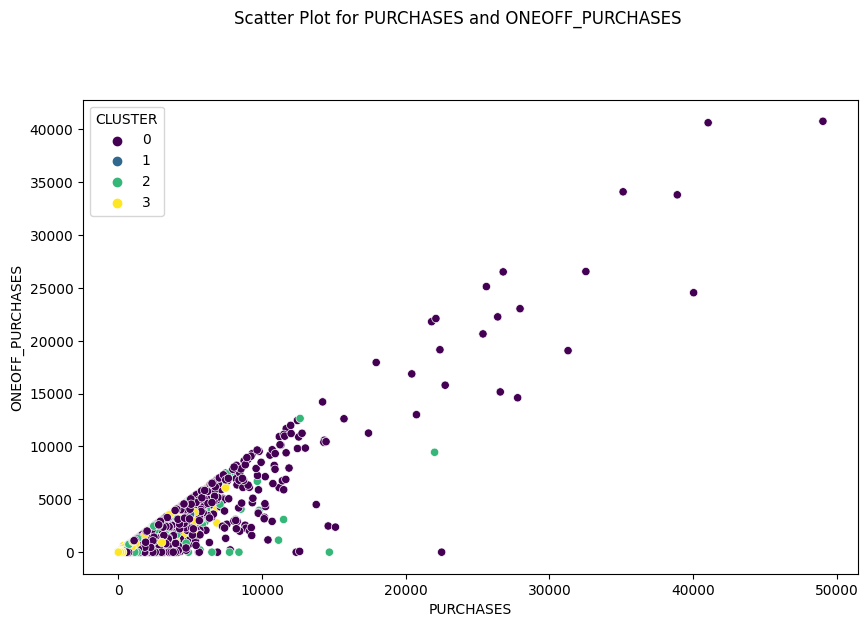

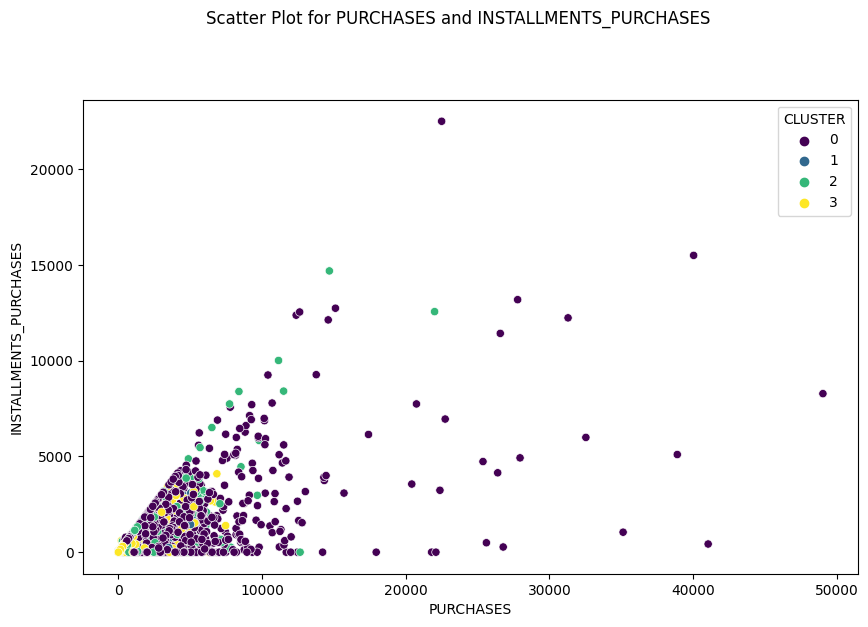

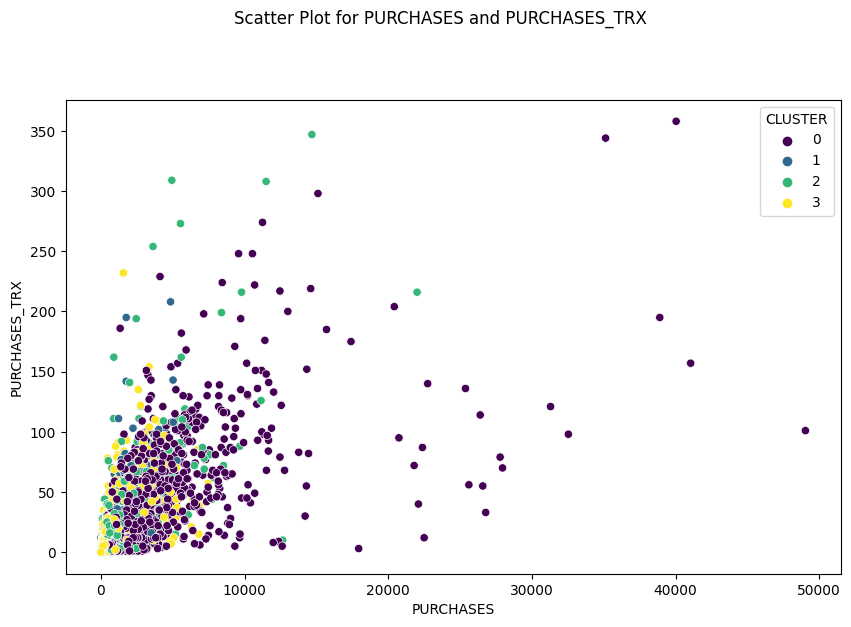

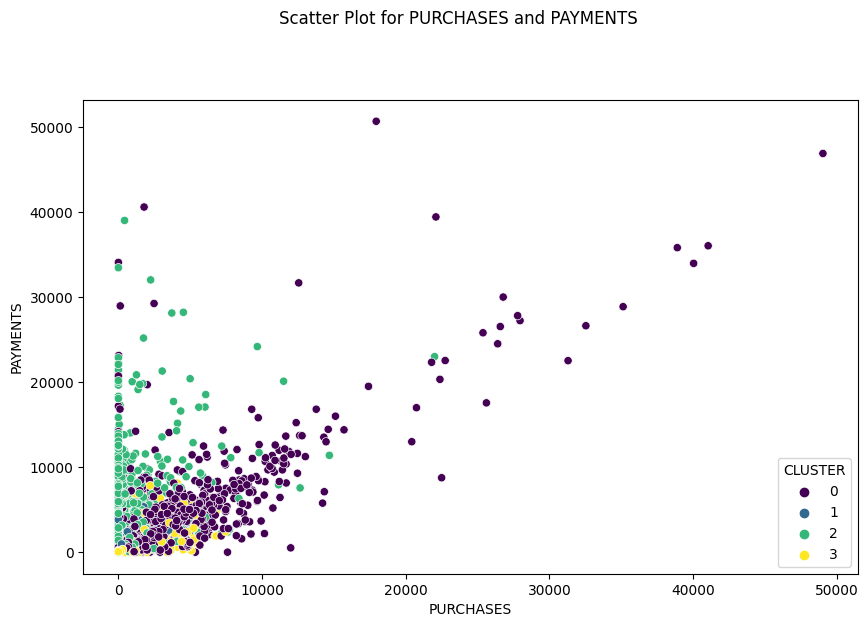

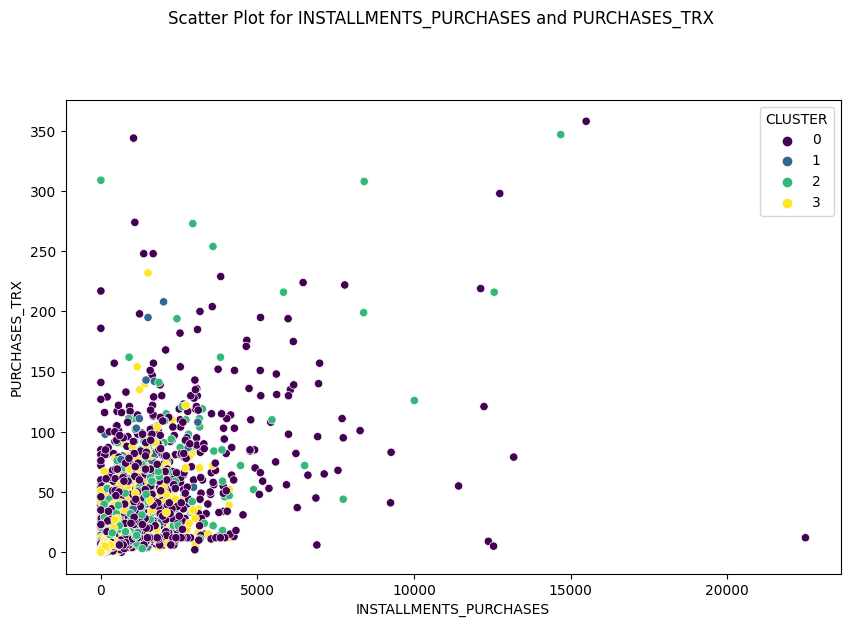

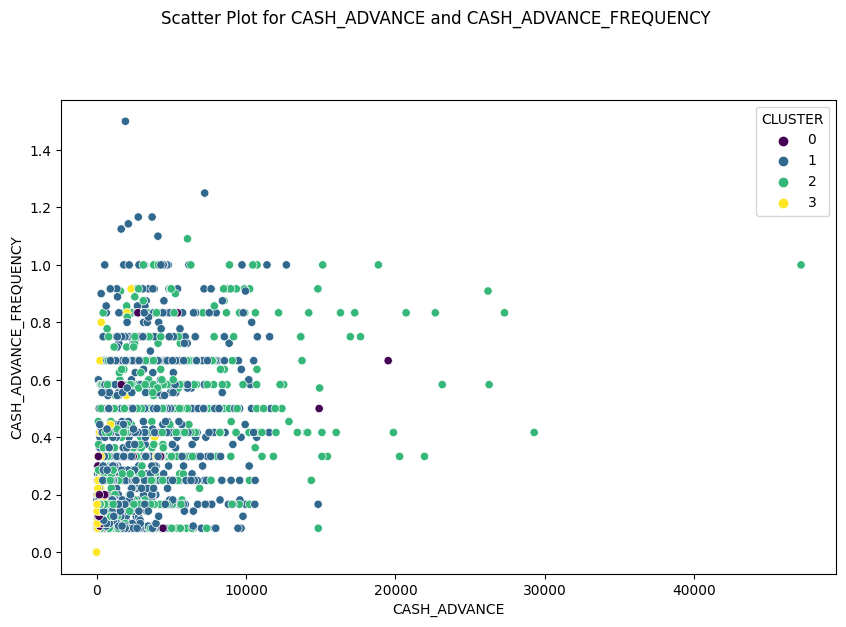

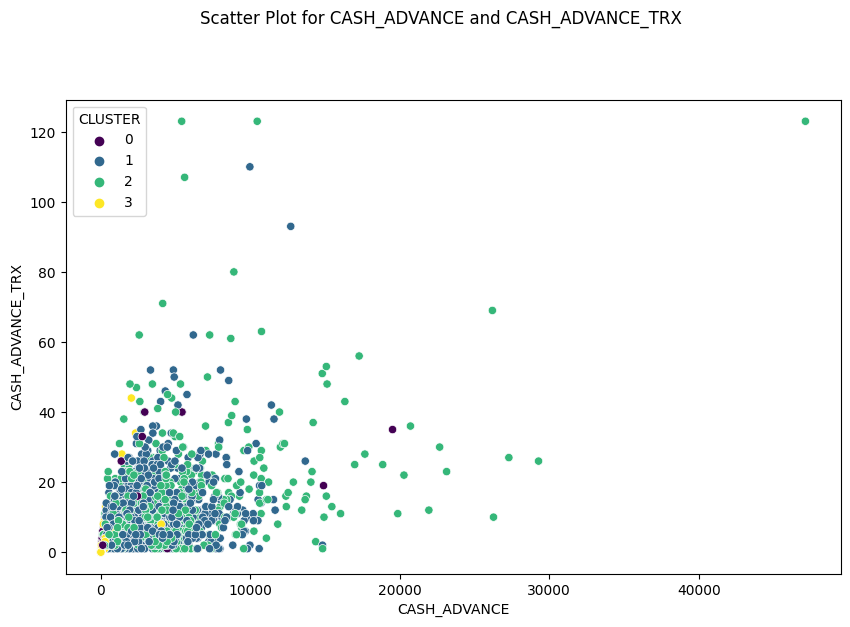

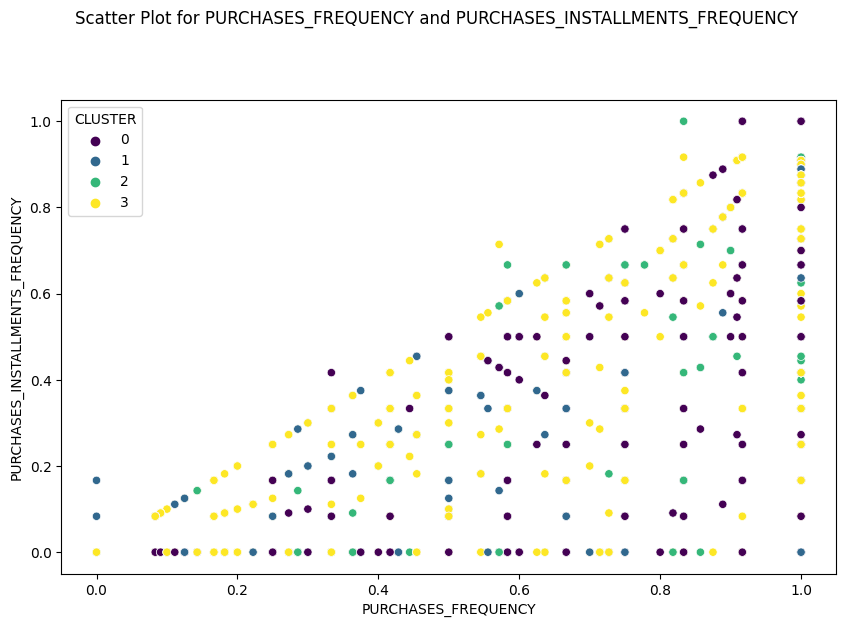

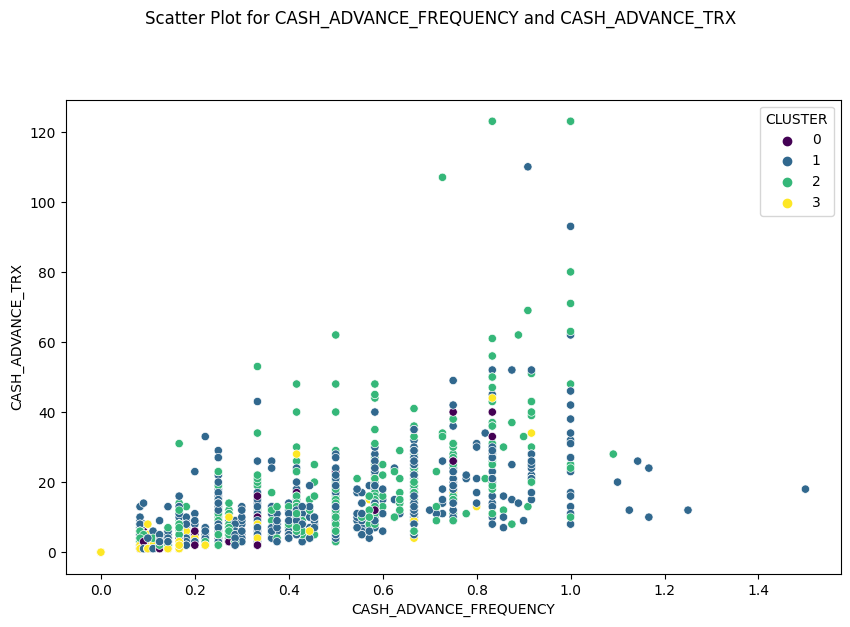

In [0]:
plot_correlations_by_cluster(dataframe)

## Correlações Identificadas por perfil de cliente


**PURCHASES e ONEOFF_PURCHASES:**

**Insight:** Perfil de cliente do Cluster 0, bons pagadores e também maior quantidade de clientes, é o que mais faz compras avulsas e gerais, a maioria são compras até 10.000,00 $.

**PURCHASES e INSTALLMENTS_PURCHASES:**

**Insight:** Perfil de cliente do Cluster 0, representam a maioria das compras gerais e parceladas.

**PURCHASES e PURCHASES_TRX:**
**Insight:**  Comportamento variado de compras e número de transações individuais, a maior parte são clientes Cluster 0, 2 e 3.

**PURCHASES e PAYMENTS:**

**Insight:** Clientes do cluster 2 costumam realizar compras em seu cadastro próprio, consequentemente é o grupo que realiza compras mais caras e são os melhores pagadores. Clientes do cluster 0, realizam mais quantidades de compras e pagamentos feitos por outros usuários ou sem cadastro.
**INSTALLMENTS_PURCHASES e PURCHASES_TRX:**

**Insight:** Clientes do cluster 0, 1 e 3 são os que fazem mais compras parceladas e transações individuais de compra. 

**CASH_ADVANCE e CASH_ADVANCE_FREQUENCY:**

**Insight:** Clientes do cluster 1 e 2, são os que mais sacam dinheiro frequentemente, destes os do clusters 2 são os que fazem saques de maior valor

**PURCHASES_FREQUENCY e PURCHASES_INSTALLMENTS_FREQUENCY:**

**Insight:** Há uma grande variedade entre todos os tipos de clientes/clusters relacionados a correlação de PURCHASES_FREQUENCY e PURCHASES_INSTALLMENTS_FREQUENCY, indicando uma relação entre a frequência das compras gerais e a frequência das compras feitas em parcelas.

**CASH_ADVANCE e CASH_ADVANCE_TRX:**

**Insight:** há uma grande correlação entre clientes que fazem pagamentos e saque dinheiro frequentemente, a maior parte desses clientes são do cluster 2 e 1.
